# Module 1: Customer Demographics

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## FUNCTIONS

In [2]:
def disto_bars(colname, df):
    # Check for missing values
    print(f'There are {df[colname].isna().sum()} missing entries for {colname}.')

    # Plot distribution
    value_counts = df[colname].value_counts(dropna=False).sort_index()

    plt.figure()
    plt.bar(value_counts.index.astype(str), value_counts.values)
    #plt.text(value_counts.index.astype(str)[-1], value_counts.values[-1]+100, str(value_counts.values[1]), color='red')
    plt.xticks(rotation=90)
    plt.xlabel(colname)
    plt.ylabel('count')
    plt.title('Counts per category')
    plt.show()

In [3]:
def disto_histo(colname, df, bins=30):
    # Check for missing values
    print(f'There are {df[colname].isna().sum()} missing values for {colname}.')
    # Histogram
    plt.figure()
    plt.hist(df[colname], bins)
    plt.xlabel(colname)
    plt.ylabel('count')
    plt.title('Distribution of values for ' + colname)
    plt.show()

In [4]:
def sort_str_vals (colname, df):
    uq_jobs = df[colname].unique()
    # Get the indices to sort the array alphabetically, handling NaN values
    sorted_indices = np.argsort(np.array(uq_jobs, dtype=str))

    # Sort the ndarray based on the sorted indices
    sorted_array = uq_jobs[sorted_indices]

    # display
    return sorted_array

## Load data

In [5]:
custdem = pd.read_csv('customerdemographics.csv', skiprows=[0], index_col=0)
print('Table dimensions:', custdem.shape)

Table dimensions: (4000, 13)


In [6]:
display(custdem.head())

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,,,,,,,,,,,,,
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


## Identify flaws

### Duplications

In [7]:
print('Number of duplicated rows:', custdem.duplicated().sum())
print('Number of duplicated columns:', custdem.T.duplicated().sum())

Number of duplicated rows: 0
Number of duplicated columns: 0


### `index` - `customer_id`

Check that `customer_id` is identical to the index of the table and drop customer ID if this is the case

In [8]:
if (custdem.index==custdem['customer_id']).all():
    custdem.drop(columns='customer_id', inplace=True)

print('Index duplicates:', custdem.index.duplicated().sum())

Index duplicates: 0


### `first_name` and `last_name`

In [9]:
# type for the columns
print('First Name type:', custdem.first_name.dtype)
print('Last Name type:', custdem.last_name.dtype)

# Missing values
print('First Name missing values:', custdem.first_name.isna().sum())
print('Last Name missing values:', custdem.last_name.isna().sum())

First Name type: object
Last Name type: object
First Name missing values: 0
Last Name missing values: 125


<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 125 missing values for Last Name.
</div>

### `gender`

There are 0 missing entries for gender.


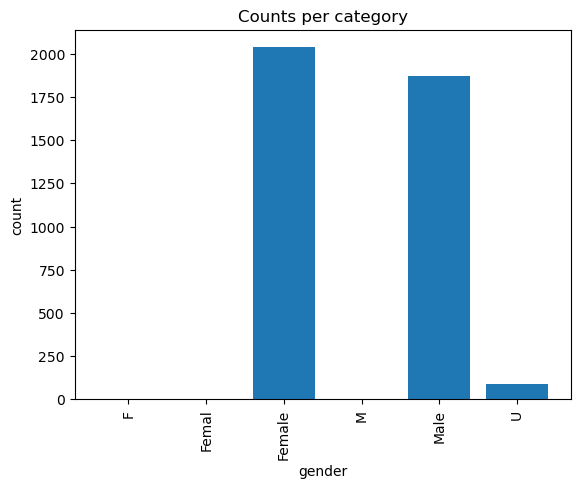

In [10]:
disto_bars('gender', custdem)

<div class="alert alert-warning">
    <strong>Tidy Up:</strong> For the sake of consistency, "F" will be converted to "Female", "M" will be converted to "Male" and the typo of "Femal" will be fixed.
</div>

In [11]:
# Define replacement
repl_dict = {'F': 'Female',
             'Femal' : 'Female',
             'M' : 'Male'}

# Replace faulty entries
custdem['gender'] = custdem['gender'].replace(repl_dict)

There are 0 missing entries for gender.


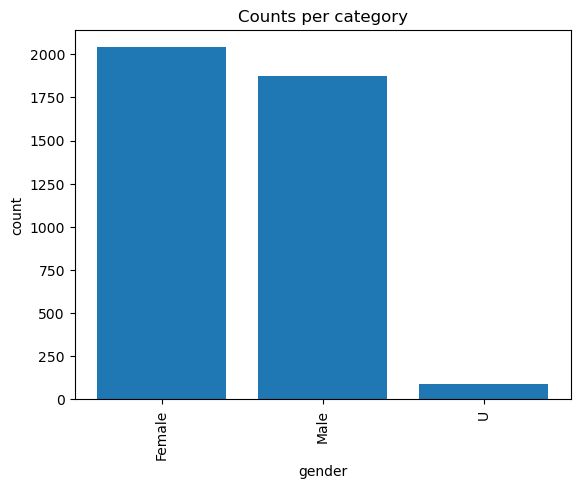

In [12]:
disto_bars('gender', custdem)

This feature is ready for downstream analysis.

### `past_3_years_bike_related_purchases`

There are 0 missing values for past_3_years_bike_related_purchases.


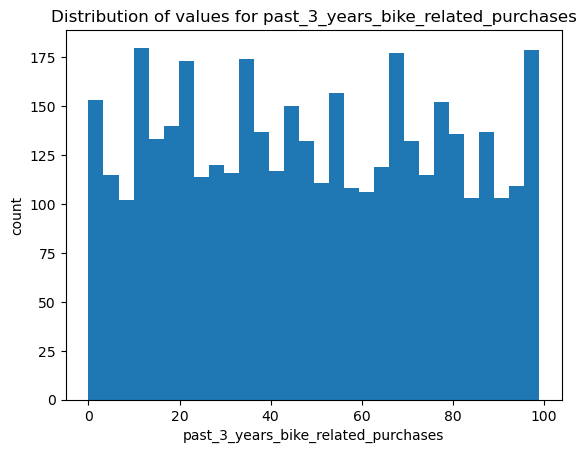

In [13]:
disto_histo('past_3_years_bike_related_purchases', custdem)

### `DOB`

In [14]:
print('Missing dates of birth:', custdem.DOB.isna().sum())
# Convert to datetime
custdem['DOB'] = pd.to_datetime(custdem['DOB'], errors='coerce')
# Sanity check
print('Missing dates of birth:', custdem.DOB.isna().sum())

Missing dates of birth: 87
Missing dates of birth: 87


<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 87 missing dates for date of birth.
</div>

### `job_title`

There are 506 missing entries for job_title.


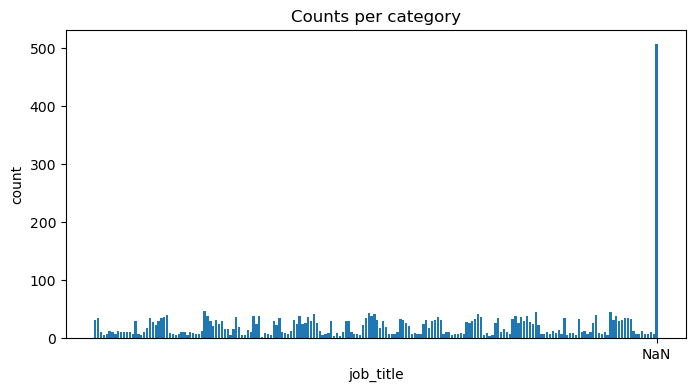

['Account Coordinator' 'Account Executive' 'Account Representative I'
 'Account Representative II' 'Account Representative III'
 'Account Representative IV' 'Accountant I' 'Accountant II'
 'Accountant III' 'Accountant IV' 'Accounting Assistant I'
 'Accounting Assistant II' 'Accounting Assistant III'
 'Accounting Assistant IV' 'Actuary' 'Administrative Assistant I'
 'Administrative Assistant II' 'Administrative Assistant III'
 'Administrative Assistant IV' 'Administrative Officer'
 'Analog Circuit Design manager' 'Analyst Programmer' 'Assistant Manager'
 'Assistant Media Planner' 'Assistant Professor' 'Associate Professor'
 'Automation Specialist I' 'Automation Specialist II'
 'Automation Specialist III' 'Automation Specialist IV'
 'Biostatistician I' 'Biostatistician II' 'Biostatistician III'
 'Biostatistician IV' 'Budget/Accounting Analyst I'
 'Budget/Accounting Analyst II' 'Budget/Accounting Analyst III'
 'Budget/Accounting Analyst IV' 'Business Systems Development Analyst'
 'Chemica

In [15]:
colname = 'job_title'
df = custdem

# Check for missing values
print(f'There are {df[colname].isna().sum()} missing entries for {colname}.')

    # Plot distribution
value_counts = df[colname].value_counts(dropna=False).sort_index()
labels = [str(val) if not pd.isna(val) else 'NaN' for val in value_counts.index]
plt.figure(figsize=(8, 4))
bars = plt.bar(range(len(value_counts)), value_counts.values)
plt.xticks([labels.index('NaN')], ['NaN'], rotation=0)  # Set the tick only for 'NaN'
plt.xlabel(colname)
plt.ylabel('count')
plt.title('Counts per category')
plt.show()

sorted_vals = sort_str_vals('job_title', custdem)

# display
print(sorted_vals)

<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 506 missing entries for job title information. The null values are likely referring to unemployed individuals as there is no 'unemployed' category.
</div>

### `job_industry_category`

['Argiculture' 'Entertainment' 'Financial Services' 'Health' 'IT'
 'Manufacturing' 'Property' 'Retail' 'Telecommunications' nan]
There are 656 missing entries for job_industry_category.


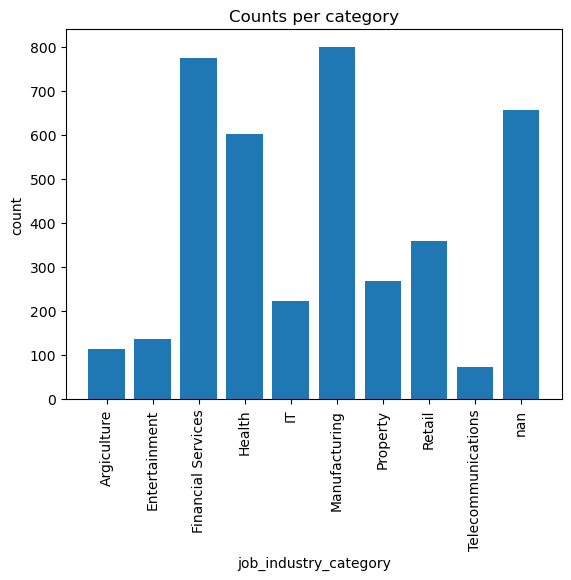

In [21]:
# Sort job industry
sorted_vals = sort_str_vals('job_industry_category', custdem)

# display
print(sorted_vals)

disto_bars('job_industry_category', custdem)

In [22]:
print(custdem.loc[custdem['job_title'].isna() & custdem['job_industry_category'].isna(),
                  ['job_industry_category','job_title']].shape)
display(custdem.loc[custdem['job_title'].isna() & custdem['job_industry_category'].isna(), ['job_industry_category','job_title']])

(105, 2)


,job_industry_category,job_title
0,,
23,NaN,NaN
46,NaN,NaN
74,NaN,NaN
108,NaN,NaN
161,NaN,NaN
...,...,...
3840,NaN,NaN
3893,NaN,NaN
3929,NaN,NaN


<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 656 missing entries for job category information. Only 105 of these entries also correspond to nulls in job title. These entries may likely refer to unemployed individuals.
</div>

### `wealth_segment`

There are 0 missing entries for wealth_segment.


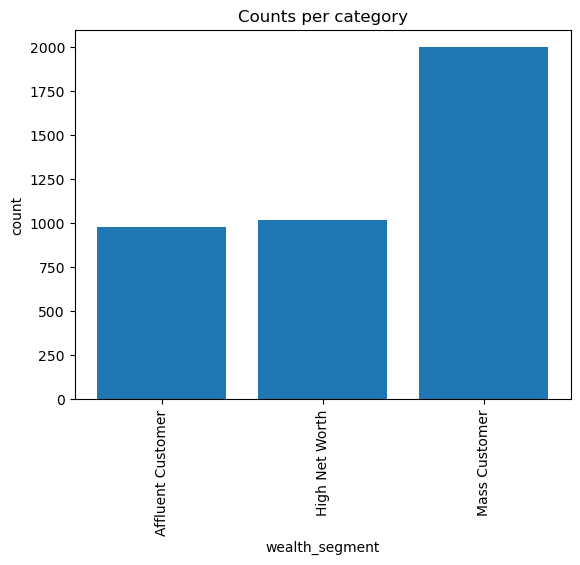

In [23]:
disto_bars('wealth_segment', custdem)

### `deceased_indicator`

There are 0 missing entries for deceased_indicator.


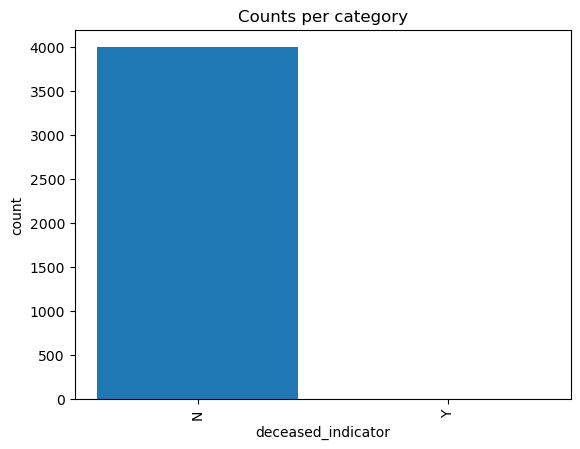

In [25]:
disto_bars('deceased_indicator', custdem)

In [31]:
(custdem.deceased_indicator == 'Y').sum()

2

### `owns_car`

There are 0 missing entries for owns_car.


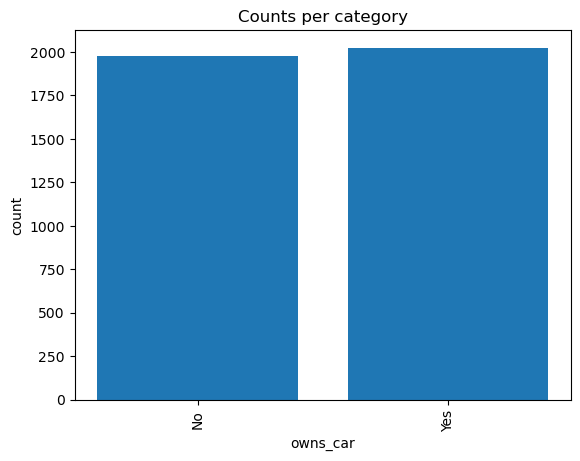

In [32]:
disto_bars('owns_car', custdem)

### `tenure`

There are 87 missing entries for tenure.


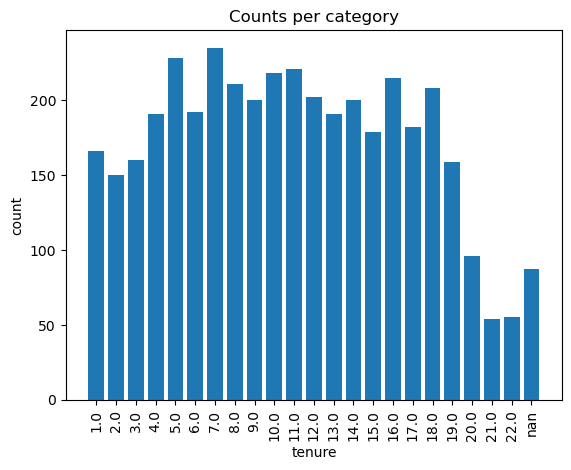

In [33]:
disto_bars('tenure', custdem)

Here we have close to 100 entries with null values and no 0 compared to the new customers list table where we had 0 instead of NaN. The NaN will therefore be converted to 0 here and the type of the values will be converted to integers

There are 0 missing entries for tenure.


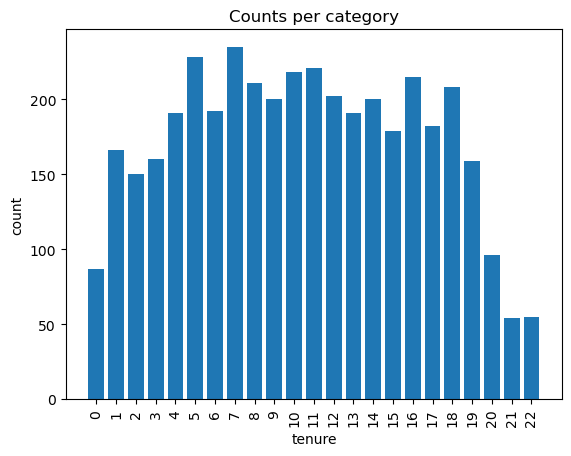

In [38]:
custdem['tenure'].fillna(0, inplace=True)
custdem['tenure'] = custdem['tenure'].astype(int)
disto_bars('tenure', custdem)

### `wealth_segment`

There are 0 missing entries for wealth_segment.


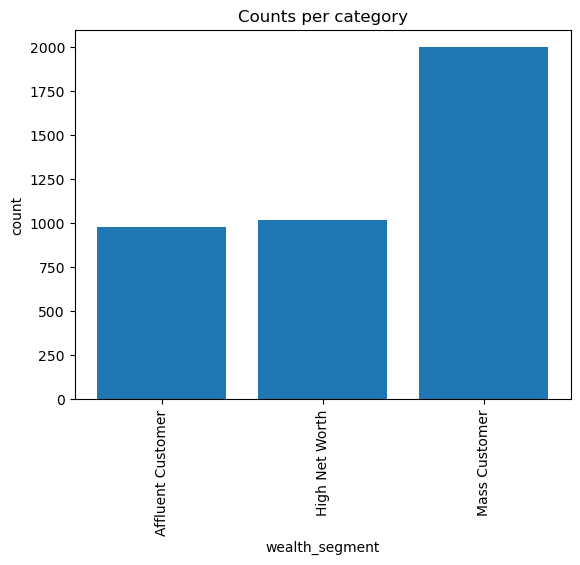

In [39]:
disto_bars('wealth_segment', custdem)

### `default`

There are 302 missing entries for default.


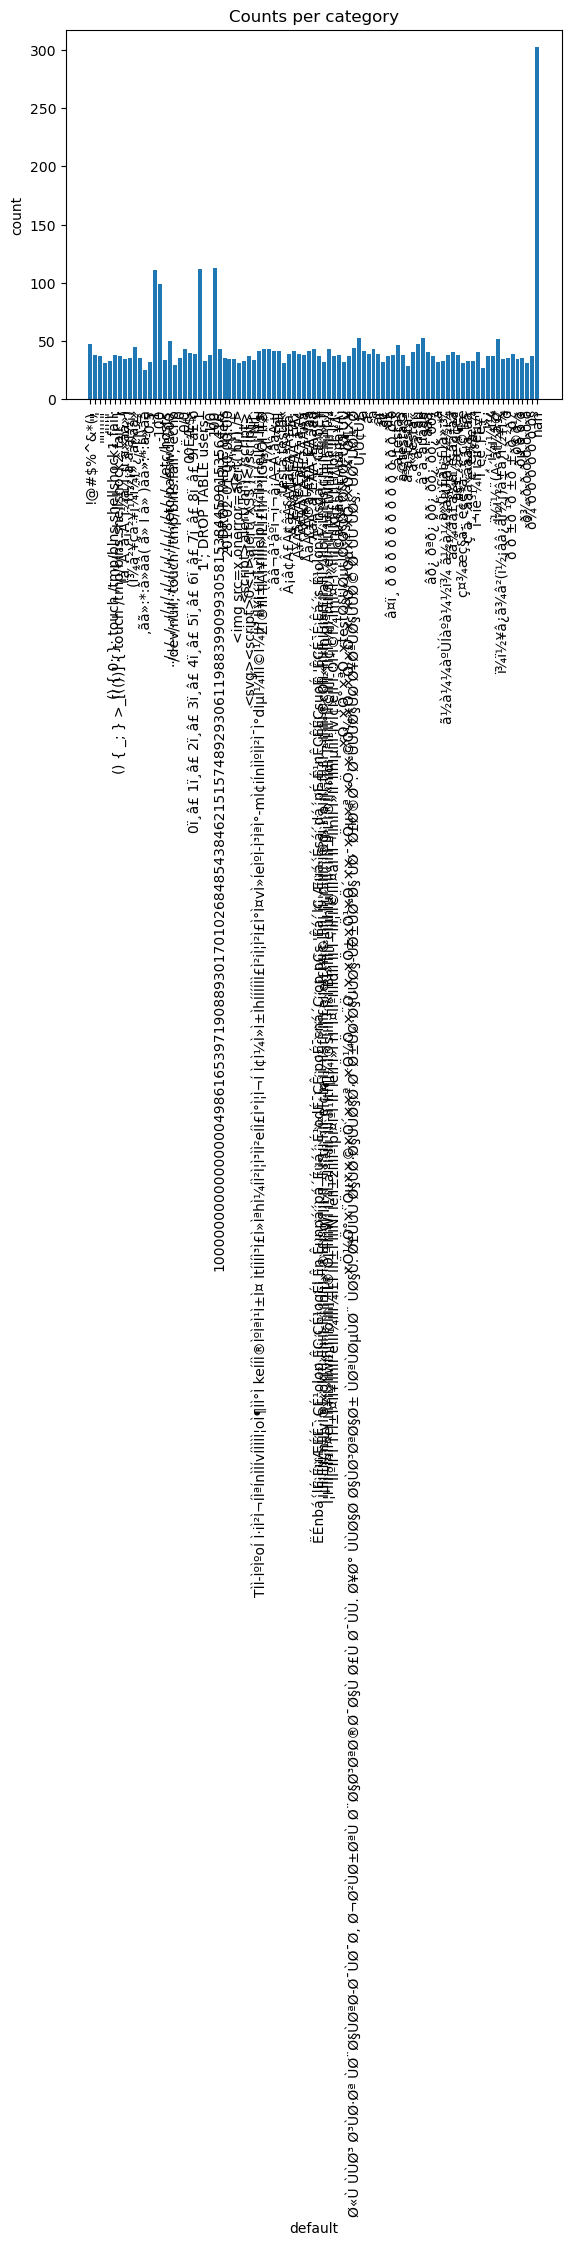

In [40]:
disto_bars('default', custdem)

In [41]:
# Sort job industry
sorted_vals = sort_str_vals('default', custdem)

# display
print(sorted_vals)

['!@#$%^&*()' '"\'' "'" '\'"\'\'\'\'"' '\'\'\'\'"'
 '() { 0; }; touch /tmp/blns.shellshock1.fail;'
 '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }'
 '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)' '(ï½¡â â âï½¡)' '(ï¾à²¥çà²¥ï¼ï¾ï»¿ â»ââ»'
 ",./;'[]\\-=" ',ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ' '-0.5' '-1' '-100'
 '../../../../../../../../../../../etc/hosts'
 '../../../../../../../../../../../etc/passwd%00'
 '/dev/null; touch /tmp/blns.fail ; echo' '0' '0/0' '00ËÆ$-'
 '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð' '1'
 "1'; DROP TABLE users--" '1/0' '100'
 '1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416'
 '1;DROP TABLE users' '2018-02-01 00:00:00' '<>?:"{}|_+'
 "<img src=x onerror=alert('hi') />" "<script>alert('hi')</script>"
 "<svg><script>0<1>alert('XSS')</script>" 'NIL'
 'TÌÌ\xadÌºÌºoÍ Ì·iÌ²Ì¬ÍÌªÍnÌÌÍvÍÌÌÌÌ¦oÌ¶ÌÌ°Ì\xa0keÍÍÌ®ÌºÌªÌ¹Ì±Ì¤ ÌtÍÌÍÌ³Ì£Ì»ÌªhÌ¼ÍÌ²Ì¦Ì³ÌÌ²eÍÌ£Ì°Ì¦Ì¬Í Ì¢Ì¼Ì»Ì±ÌhÍÍÍÍÌÌ£Ì²iÌ¦Ì²Ì£Ì°Ì¤vÌ»ÍeÌºÌ\xadÌ³ÌªÌ°-mÌ¢iÍnÌÌºÌ

<div class="alert alert-danger">
    <strong>ENCRYPTED:</strong> There are 302 missing entries for default status. In addition, it appears that the entries for this feature are encrypted and unusable. This feature will have to be dropped if the values cannot be decrypted properly.
</div>

## Save

In [43]:
custdem.to_csv('customer_demographics_clean1.csv')

---